In [1]:
%pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


Data saved to books_scraped.csv


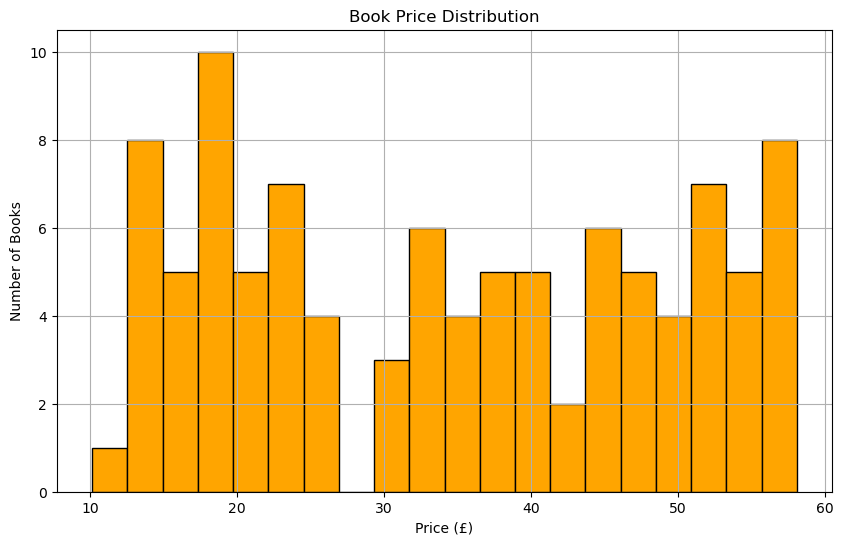

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

titles = []
prices = []
availability = []

for page in range(1, 6):  # Scrape first 5 pages
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url)
    response.encoding = 'utf-8'  # Fix encoding
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        titles.append(title)

        price = book.find('p', class_='price_color').text.strip()
        prices.append(price)

        avail = book.find('p', class_='instock availability').text.strip()
        availability.append(avail)

# Create DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Availability': availability
})

# Clean price column for visualization
df['Price_clean'] = df['Price'].str.replace('£', '').str.replace('Â', '').astype(float)

# Save to CSV
df.to_csv('books_scraped.csv', index=False)
print("Data saved to books_scraped.csv")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Price_clean'], bins=20, color='orange', edgecolor='black')
plt.title('Book Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()
